In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

# Chapter 10: Introduction to ANN with Keras
## Building a Classification MLP using the squential API

## Load data, split into train, validation and test

In [2]:
# load data 
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# split training set into training set and validation set 
# B/c we are going to use gradient descent, we must scale the input features. 

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# label names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## Start building the model

In [3]:
# creating the model using the sequential API
# Here is a classification Multi-layer perceptron with two hidden layers: 
model = keras.models.Sequential() # sequantial model is the simplest kind of keras modl for neural networks that are 
                                  # just composed of a single stack of layers connected sequentially. 
model.add(keras.layers.Flatten(input_shape=[28,28])) # input layer whose role is to convert each input image into a 1D array: 
                                                     # If it receives input data X, it computes X.reshape(-1,1),
                                                     # This layer does not have any parameter. 
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

"""
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
"""
model.summary() # the first dense layer has 300*784 weight parameters + 300 bias parameters. 



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## Extract hidden layer, weights and biases.

In [ ]:
# Can easily get a model's list of layers, to fetch a lyer by its index, or you can fetch it by names 
model.layers
hidden1 = model.layers[1]

# Can extract all the parameters of a layer using its getter and setter methods. 
# For a dense layer, this includes both the connection weights and the bias terms. 
weights, biases = hidden1.get_weights()
weights.shape
biases.shape

# here note that the Dense layer initialized the connection weights randomly before we start training. 
# and the biases were initialized to zeros. 
# To use a different initilization methid, can use kernel_initilizer (kernel is another name for the matrix of connection weights), 
# or bias_initilizer when creating the layer. 

## Compiling the model, Specifying loss function, optimizer and metrics to use. 

In [4]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

# loss
# we use the "sparse_categorical_crossentropy" because we have sparse labels and the classes are exclusive. 
# If instead we had one target probability per class for each instance (such as one-hot vectors), 
# e.g. [0.,0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3, then we would need to use the "categorical_crossentropy" loss instead. 

# optimizer: 
# will generally want to use optimizer=keras.optimizers.SGD(lr=???), rather than optimizer="sgd", which defaults to lr=0.01.

# to convert sparse labels to one-hot vector labels, use keras.utils.to_categorical(); to go the other way around, use np.argmax() with axis = 1
# y_train_onehot = keras.utils.to_categorical(y_train)

## Training and evaluating the model

In [5]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

# The fit() method returns a history object containing the training paramters (history.params), 
# the list of epochs it went through (history.epoch) 
# and a dictionary (histroy.history) containing the loss and extra metrics it measured at the end of each epoch 
# on the traning set and on the validation set. 

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7176 - accuracy: 0.7648 - val_loss: 0.5185 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4872 - accuracy: 0.8297 - val_loss: 0.4655 - val_accuracy: 0.8408
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4418 - accuracy: 0.8457 - val_loss: 0.4150 - val_accuracy: 0.8570
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4147 - accuracy: 0.8524 - val_loss: 0.3905 - val_accuracy: 0.8640
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3947 - accuracy: 0.8612 - val_loss: 0.3751 - val_accuracy: 0.8700
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3775 - accuracy: 0.8678 - val_loss: 0.3748 - val_accuracy: 0.8674
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3647 - accuracy: 0.8706 - val_loss: 0.3676 - val_accuracy:

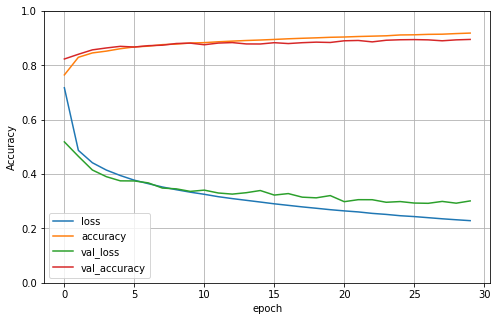

In [8]:
model.save("my_model_A.h5")
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.show()

## Using the model to make predictions

In [7]:
# out put probability for each class (softmax output)
X_new = X_test[:3]
y_prob = model.predict(X_new)
y_prob.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Building a Regression MLP using the sequential API

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing() # 8 features per sample, label is continuous. 
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

# standardrization: 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]), # does not have to have a flatten layer if the input is an array already
    keras.layers.Dense(1)
]) 
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

# Building Complex Models Using the Functional API

- One example of a nonsequential neural network is a Wide & Deep neural network.
- It connects all or part of the inputs directly to the output layer. This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path). 
- In contrast a regular MLP forces all the data to flow through the full stack of layers; thus, simple patterns in the data may end up being distorted by this sequence of transformations. <br>
<br>
<img src="img/wideDeepNet.png" style="width: 200px">



In [ ]:
input_ = keras.layers.Input(shape=X_train.shape[1:]) 
hidden1 = keras.layers.Dense(30, activation="relu")(input_) # as soon as it is created, notice that we call it like a function, passing it the input. 
                                                            # This is why this is called the functional API. 
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

* <img src="img/wideDeepNet_mulInput.png" style="width: 200px">

In [ ]:
# build a wide & deep neural network with slightly more complicated architecture
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

# train and test the model 
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3)) # specify loss function and optimizer with learning rate 

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:] # the input for the wide features would be the first 5 features
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:] # the input for the deep features would be the last 6 (2 - 7) features
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))



## Using the subclassing API to build dynamic models

- Both the sequential and the functional API are declarative. However, some models involve loops, varting shapes, conditional branching and other dynamic behaviors. For such cases, we could use the subclassing API. 

- To do that, simply subclass the Model class, create the layers you need in the constractor, and use them to perform the computations you want in the call() method. 

In [ ]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
model = WideAndDeepModel()

## Saving and restoring a model
- For static models, can simply do **model.save("keras_model.h5")**.
- To load, can do **model = keras.models.load_model("my_keras_model.h5")**
- This will not work when using model subclassing, but can use save_weights() and load_weights() to at least save and restore the model parameters. 

## Callbacks

In [ ]:
# option1: Use checkpoint
#checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])
#model = keras.models.load_model("my_keras_model.h5") # roll back to best model

# option2: Use earlystopping
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])

# Chapter 11: Traning DNN
When training a deep DNN with many layers, here are the possible problems we are facing: 
## Problem 1: Vanishing or exploding gradient <br>

### Solution 1: Activation functiona and initilization methods
- fan-in: the maximum number of inputs that a system can accpet <br>
- fan-out: the maximum number of inputs that the output of a system can deed to other systems (the number of neurons in a layer) <br>
- fan-avg: (fan-in + fan-out)/2
- Xavier initialization or Glorot initilization for sigmoid activation function.
- He initialization for ReLU activation function.
- The initilization parameter can be under normal or uniform distribution. <br>
<br>
<img src="img/initialization_param.png" style="width: 400px">

#### Solution 2: Batch Normalization layer
- Adding a layer in the model just before or after the activation function of each hidden layer. This operation simply zero-centers and normalizes each input, then scales and shifts the result using two new parameter vectors per layer: ne for scaling, the other for shiting. 
- Four parameter vectors are learned in each batch-normalization layer: $\gamma$ (the output scale vactor) and $\beta$ (the output offset vector), learned through regular backpropagaton, and $\mu$ (the final input mean vector) and $\sigma$ are estimated during training, but only used after training (for applying to the test samples)

In [11]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(), # 4 x 28 x 28 parameter
    keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False),
    keras.layers.BatchNormalization(), 
    keras.layers.Activation("elu"),
    keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(10, activation="softmax")
    ])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_4 (Dense)              (None, 300)               235200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
activation (Activation)      (None, 300)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               30000     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)              

### Solution 3: Gradient Clipping
- Clip the gradient during backpropagation so that they never exceed some threshold

In [ ]:
optimizer = keras.optimizers.SGD(clipvalue=1.0) # This optimizer will clip every component of the gradient vector to a value between -1.0 to 1.0. 
                                                # This means that all the partial derivatives of the loss (with regad to each and every trainable parameter) will be clipped between -1.0 and 1.0
                                                # Can also do clipnorm given regularization. 
model.compile(loss="mse", optimizer=optimizer)

## Problem 2: hard to find fully labeled training data
### Solution 1: Reusing pretrained layers
- Should always try to find an existing neural network that accomplishes a similar task to the one you are trying to tackle. Then reuse the lower layers of this network. This technique is called **transfer learning**. It will not only speed up training considerably, but also require significantly less traning data. 
- If the input picture of your new task do not have the same size as the ones used in the original task, you will usually have to add a preprocessing step to resize them to the size expected by the original model. 

In [9]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])  # Note that when you train model_B_on_A, it will also affect model_A. 
                                                             # need to clone if want otherwise 
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

# model_A_clone = keras.models.clone_model(model_A)
# model_A_clone.set_weights(model_A.get_weights())

# When training this new model, we would want to freeze the reused layers during the first few epochs, 
# giving the new layer some time to learn reasonable weights. 
# To do this, set every layer's **trainable** attribute to False and compile the model. 
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False
model_B_on_A.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

# Codes here are pretty much psuedo code, missing some arguments
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4, validation_data=(X_valid_B, y_valid_B)) # train for a few epoch for the new layer to catch up 
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True # then unfreeze the reused layers 
optimizer = keras.optimizers.SGD(lr=1e-4) # the default lr is 1e-2, decrease the learning rate 
model_B_on_A.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"]) # recompile the optimizer 
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16, validation_data=(X_valid_B, y_valid_B)) # keep traning 

# Note that transfer learning does not work very well with small dense networks, presumably because small networks learn few 
# patterns, and dense networks learn very specific patterns, which are likely to be useful in other tasks. 

### Solution 2: Unsupervised Pretraining
- Not yet understand, revist after RNN and GAN
- Self-supervised learning is when you automatically generate the labels from the data itself, the you train a model on the resulting "labeled" datset using supervised learning techniques. Since this approach requires no human labeling whatsoever, it is best classified as a form of unsupervised learning. 
### Solution 3: Faster Optimizers than the regular gradient descent optimizer. 
1. Momentum optimizer <br />
<br>
Accounts for previous gradient: <br />
<br>
<img src="img/gradient_descent_momentum.png" style="width: 200px"> <br />
<br>
**optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)**, with momentum $\beta$ being 0.9 tend to work pretty well <br>
<br>

2. Nesterov Accelerated Gradeint <br>
<br>
Small tweak based on regular momentum optimizer; Usually faster than regular momentum optimization<br>
<br>
<img src="img/Nestrov_momentum.png" style="width: 200px"> <br />
<br>
**optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)** <br>
<br>
<img src="img/regular_vs_nesterov_momentum.png" style="width: 400px"> <br />
<br>

3. AdaGrad
- This algorithm decays the learning rate, but it does so faster for steep dimensions than for dimensions with gentler slopes. This is called an adaptive learning rate. It helps point the resulting updates more directly toward the global optimal. <br>
- Institutes a per-parameter leraning rate rather than a globally-shared rate. The idea is to normalize updates to the features. Parameter that has a large gradient would have a relatively small learning rate (small stride) whereas parameters that have a small gradient would have a large learning rage (large stride) <br>
- Usually stop early, before reaching global optimum. <br>
<br>
<img src="img/adagrad.png" style="width: 300px"> <br/>
<br>

4. RMSProp
- AdaGrad runs the risk of slowing down a bit too fast and never converging to the global optimum. The RMSProp algorithm fixes this by accumulating only the gradients from the most recent iterations (as opposed to all the gradients since the beginning of traninig). <br>
- $\beta$ is the decay rate can is set to 0.9 typically, usually work well. <br>
<br>
<img src="img/RMSProp.png" style="width: 300px"> <br/>
<br>
**optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)**<br>
<br>

5. Adam and Nadam optimization <br>
<br>
- Adam stands for adaptive moment estimation, which combines the ideas of momentum optimization and RMSProp. <br>
- The momentum decay hyperparameter $\beta1$ is typically initialized to 0.9. <br>
- The scaling decay hyperparameter $\beta2$ is often initialized to 0.999. <br>
- No eed to tune learning rate, can set to be 0.001 <br>
- Nadam is Adam plus the Nesterov trick, can usually converge faster <br>
<br>
**optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)** <br>
<br>
<img src="img/Adam.png" style="width: 300px"> <br>


## Problem 3: Overfitting 
### Solution 1: Avoiding overfitting through regularization

- L1 (Lasso) and L2 (Ridge) <br>
<br>
- **layer = keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.01))**<br>
<br>
- Can also use functools.partial() to create a think wrapper for any collable, with some default arguement values: 

In [27]:
from functools import partial
RegularizedDense = partial(keras.layers.Dense,
    activation="elu",
    kernel_initializer="he_normal",
    kernel_regularizer=keras.regularizers.l2(0.01))
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax", kernel_initializer="glorot_uniform")
])

### Solution 2: Dropout
- At each training step, every neuron (including the input neurons, but always excluding the output neurons) has a probability p of being temporarily dropped out, meaning it will be entirely ignored during this training step, but it may be active during the next step. The hyperparameter p is called the dropout rate, and it is typically set between 10% and 50%: closer to 20-30% in RNN, and closer to 40-50% in CNN. After training, neurons do not get dropped anymore. 
- One small but important techniqual detail. Suppose p = 50%, in which case during test a neuron would be connected to twice as many input neurons as it would be (on average) during training. To compensate for this fact, we need to multiply each input connection weight by the keep probability (1-p) after training. Alternatively, we can divide each neuron's output by the keep probability during training. 

In [28]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])

# Chapter 12. Custom Models and Training with TensorFlow
Low level APIs would be useful when you need extra control to write custom loss functions, custom metrics, layers, models, initializers, regularizers, weight constraints and more. <br>
<br>
<img src="img/tf_pythonapi.png" style="width: 600px"> <br>
<br>
<img src="img/tf_architecture.png" style="width: 600px"> <br>
<br>
## Custom Loss function
- Say we want to implement Huber loss, which is less sensitive to outliers (MSE) in the data. It uses a quadratic loss if the loss is within some threshold, but a linear loss if the loss surpassed the threshold. 

In [29]:
# define huber loss: If want to benefit from TF's graph features, should use TF operations
# It is also preferable to return a tensor containing one loss per instance rather than returning the mean loss. 
# So that Keras can apply class weights if samples are skewed. 
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1 # if the loss is larger than the threshold or not. 
    square_loss = tf.square(error) / 2
    linear_loss = tf.abs(error) - 0.5
    return tf.where(is_small_error, square_loss, linear_loss)

# Implementing Huber loss: 
model.compile(loss=huber_fn, optimizer="nadam")
model.fit(X_train, y_train, [...])

# Note that when you load a model containing custom objects, you need to map the names to the objects: 
model = keras.models.load_model("my_model_with_a_custom_loss.h5", custom_objects={"huber_fn": huber_fn})

# In order not to hard code the threshold, we could write a subclass of the keras.losses.loss calss: 
# And then implementing its get_config() method. 
class HuberLoss(keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs) # hyperparameters for the parent class: The name of the loss and the reduction algorithm 
                                   # by default it is the sum_over_batch_size 
    def call(self, y_true, y_pred): # override the call function. 
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}
# in this case, after compiling the model: 
model.compile(loss=HuberLoss(2.), optimizer="nadam")
# When you save the model, the threshold will be saved along with it, and when you load the model, 
# you just need to map the class name to the class itself: 
model = keras.models.load_model("my_model_with_a_custom_loss_class.h5", custom_objects={"HuberLoss": HuberLoss})


## Custom Activation function, initilizers, regularizers and constraints:

In [ ]:
def my_softplus(z): # return value is just tf.nn.softplus(z)
    return tf.math.log(tf.exp(z) + 1.0)
def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)
def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))
def my_positive_weights(weights): # return value is just tf.nn.relu(weights)
    return tf.where(weights < 0., tf.zeros_like(weights), weights)

layer = keras.layers.Dense(30, activation=my_softplus,
    kernel_initializer=my_glorot_initializer,
    kernel_regularizer=my_l1_regularizer,
    kernel_constraint=my_positive_weights)

# If a function has hyperparameters that need to be saved along with the model, then you will want to subclass the appropriate class, 
# such as keras.regularizers.Regularizer, keras.constraints.Constraint, keras.initializers.Initializer, or keras.layers.Layer
class MyL1Regularizer(keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor
    def __call__(self, weights): # need to override call() for losses, layers (including activation funcs) and models, 
                                 # or the __call__() method for regularizers, initializers and constraints.
        return tf.reduce_sum(tf.abs(self.factor * weights))
    def get_config(self):
        return {"factor": self.factor}

# Convolutional Neural Network 

#### The most important building block of a CNN is the convolutional layer: neurons in the first convolutional layer are not connected to every single pixel in the input image (like they were in the layers discussed in previous chapters), but only to pixels in their receptive fields (see Figure 14-2). In turn, each neuron in the second convolutional layer is connected only to neurons located within a small rectangle in the first layer. This architecture allows the network to concentrate on small low-level features in the first hidden layer, then assemble them into larger higher-level features in the next hidden layer, and so on.<br>
<br>
<img src="img/convolutional_layer.png" style="width: 500px"> <br>
<br>

#### In the diagram, a 5 x 7 input layer (plus zero padding) is connected to a 3 x 4 layer, using 3 x 3 receptive fields and a stride of 2 (in this example, the stride is the same in both directions, but it does not have to be so).<br>
<img src="img/stride_zeropadding.png" style="width: 500px"> <br>
<br>

#### Filters: A set of weights (of the size of the receptive field) of a neuron, also called the convolution kernels. If all neurons in a layer use the same filter (and the bias term), the layer outputs a **feature map**, which highlights the areas in an image that activate the filter (e.g., horizontal line) the most. During training the convolutional layer will automatically learn the most useful filters for its task, and the layers above will learn to combine them into more complex patterns. <br>

#### A convolutional layer: has multiple filters and outputs one feature map per filter, so it is more accurately represented in 3D. It has one neuron per pixel in each feature map, and all neurons within a given feature map share the same paramters (i.e., the same weights and bias term). Neurons in different feature maps use different parameters. Note that all neurons located in the same row and column but in different feature maps are connected to the outputs of the exact same neurons in the previous layer. 

#### Note that a kernel should in principle has 3d structure, one weight matrix for each input layer
<br>
<img src="img/stack_convolution_layers.png" style="width: 500px"> <br>
<br>


## Tensorflow implementation

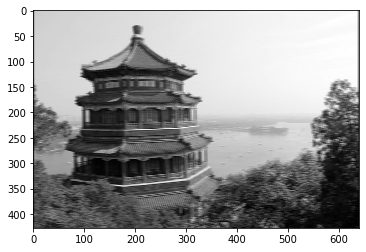

In [93]:
from sklearn.datasets import load_sample_image
import numpy as np
# Load sample images
china = load_sample_image("china.jpg") / 255 # The pixel intensity for each color channel (RGB) is represented as a byte from 0 
                                             # to 255, so we scale these features simply by dividing by 255, to get floats ranging from 0 to 1. 
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape # 2 images per batch, each image is of 427 x 640, 
                                                   # each image has 3 color layers. 
# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32) # each filter is 7x7, one for each channel. 
filters[:, 3, :, 0] = 1 # vertical line
filters[3, :, :, 1] = 1 # horizontal line
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME") # padding = "same" means 0 padding. 
                                                                   # images is the input mini-batch (a 4d tensor)
                                                                   # filters is the set of filters to apply (also a 4d tensor)
# if padding set to "SAME", the convolutional layer uses zero padding if necessary. The output size is set to the number of input neurons
# divided by the stride, rounded up. When strides=1, the layer’s outputs will have the same spatial dimensions (width and height)
# as its inputs, hence the name same.
# If padding set to "VALID", do not use zero padding
plt.imshow(outputs[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map 
plt.show()

# can define a convolutional layers using keras: 
conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1,padding="SAME", activation="relu")
# This code creates a Conv2D layer with 32 filters, each 3x3, using a stride of 1 and same padding, and applying 
# The ReLU activation function to its outputs. 

## Pooling Layer

#### The goal of pooling layers is to subsample (i.e., shrink) the input image in order to reduce the computational load, the memory usage, and the number of parameters. Just like in convolutional layers, each neuron in a pooling layer is connected to the outputs of a limited number of neurons in the previous layer, located within a small rectangular receptive field. You must define its size, the stride and the padding type, just like before. However, a pooling neuron has no weights; all it does is aggregate the inputs using an aggregation function such as the max or mean. <br>
<br>
<img src="img/pooling_layer.png" style="width: 500px"> <br>
<br>

#### Here the pooling layer uses a 2 x 2 pooling kernel, with a stride of 2 and no padding. Only the max input value in each receptive field makes it to the next layer, while the other inputs are dropped. 

#### A max pooling layer also introduces some level of invariance to small translation. 

In [ ]:
model = keras.models.Sequential([
    # The first layer uses 64 fairly large filters (7x7) but no stride b/c the input images are not very large. 
    # It also sets input_shape = [28,28,1] because the images are 28 x 28 pixels, with a single color channer (i.e., grayscale)
    keras.layers.Conv2D(64, 7, activation="relu", padding="SAME", input_shape=[28, 28, 1]),
    # Next we have a max pooling layer which uses a pool size of 2x2 kernel the stides default to the kernel size (i.e., 2)
    keras.layers.MaxPooling2D(2),
    # Then repeat the same structure twice: two convolutional layers followed by a max pooling layer. 
    # Note that the number of filters grows as we climb up the CNN toward the output layer: 
    # The number of low-level features is often fairly low, but there are many different ways to combine them into higher-level features. 
    keras.layers.Conv2D(128, 3, activation="relu", padding="SAME"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="SAME"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="SAME"),
    keras.layers.Conv2D(256, 3, activation="relu", padding="SAME"),
    keras.layers.MaxPooling2D(2),
    # Before passing into FC network, have to flatten it since a dense network expects a 1D array of features for each instance. 
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

## CNN architetures

### AlexNet
<img src="img/alexNet.png" style="width: 500px"> <br>
<br>
- To reduce overfitting, the authors applied dropout with a 50% dropout rate during traning to the outputs of layers F8 and f9. 
- Second, they performed data augmentation by randomly shifting the training images by various offsets, flipping them horizontally, and changing the lighting conditions. 
- Third, they also uses a competitive normalization steo immediately after the ReLU step of layers C1 and C3, called local response normalization (LRN): The most strongly activated neurons inhibit other neurons located at the **same position in neighboring feature maps**. This encourages different feature maps to specialize, pushing them apart and forcing them to explore a wider range of features, ultimately improving generalization. 
- This can be implemented using the tf.nn.local_response_normalization() function (which you can wrap in a Lambda layer if you want to use it in a Keras model).

### GoogleNet
<img src="img/inception_module.png" style="width: 500px"> <br>
<br>
- The network was much deeper than previous CNNs. This was ade possible by subnetworks called incpetion modules, which allow GoogleNet to use parameters much more efficiently than previous architectures. 
- Why inception modules have convolutional layers with 1 x 1 kernels: 
1. Although they cannot capture spatial patterns, they can capture patterns along the depth dimension. 
2. They are usually configured to output fewer feature maps than their inputs, so they serve as bottleneck layers, meaning they reduce dimensionality. This cuts the computational cost and the number of parameters, speeding up training and improving generalization.
3. Each pair of convolutional layers ([1 × 1, 3 × 3] and [1 × 1, 5 × 5]) acts like a single powerful convolutional layer, capable of
capturing more complex patterns. Indeed, instead of sweeping a simple linear classifier across the image (as a single convolutional layer does), this pair of convolutional layers sweeps a two-layer neural network across the image.
<br>

<img src="img/googlenet.png" style="width: 500px"> <br>

### ResNet (residual network)
- The key to being able to train such a deep network is to use **Skip Connection** (or shortcut connections): The signal feeding into a layer is also added to the output of a layer located a bit higher up the stack. <br>
- When you initialize a regular neural network, its weights are close to zero, so the network just outputs values close to zero. If you add a skip connection, the resulting network just outputs a copy of its inputs; in other words, it initially models the identity function. If the target function is fairly close to the identity function (which is often the case), this will speed up training considerably.
- Moreover, if you add many skip connections, the network can start making progress even if several layers have not started learning yet.

<br>
<img src="img/residual_unit.png" style="width: 500px"><br>

- Each residual unit is composed of two convolutional layers (and no pooling layer!), with batch normalization (BN) and ReLU activation, using 3x3 kernels and prevserving spatial dimentions (stride 1, "SAME padding").
- Note that the number of feature maps is doubled every few residual units, at the same time as their height and width are halved (using a convolutional layer with stride 2). When this happens, the inputs cannot be added directly to the outputs of the residual unit because they do not have the same shaoe. To solve this problem , the inputs are passed through a 1 x 1 convolutional layer with stride 2 and the right number of output feature maps. 

<img src="img/ResNet.png" style="width: 500px"><br>
<br>

## Implementing ResNet-34 NN: 
-  ResNet-34 is the ResNet with 34 layers (only counting the convolutional layers and the fully connected layer) containing 3 residual units that output 64 feature maps, 4RUs with 128 maps, 6 RUs with 256 maps and 3 RU with 512 maps


In [98]:
class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation) # set activation funcion 
        self.main_layers = [
            keras.layers.Conv2D(filters, 3, strides=strides, padding="SAME",use_bias=False),
            keras.layers.BatchNormalization(),
            self.activation, 
            keras.layers.Conv2D(filters, 3, strides=1, padding="SAME",use_bias=False),
            keras.layers.BatchNormalization()]
        self.skip_layers = []
        if strides > 1: # if halves the input image, need to pass through a convolution layer with 
            self.skip_layers = [
                keras.layers.Conv2D(filters, 1, strides=strides, padding="SAME", use_bias=False),
                keras.layers.BatchNormalization()
            ]
    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers: 
            Z = layer(Z) # make the inputs go through the main layers and the skip layers (if any)
                         # Updata Z for after each layer. 
        skip_Z = inputs
        for layer in self.skip_layers: 
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z) # Then we add both outputs and apply the activation function. 

# The we can build the ResNet-34 using a Sequential model, since it is really just a long sequence of layers. 
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, 7, strides=2, input_shape=[224,224,3], padding = "SAME", use_bias = False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size = 3, strides=2, padding="SAME"))
prev_filters=64 # The first 3 RUs have 64 filters, then the next 4 RUs have 128 filters, and so on. 
                # We then set the stride to 1 when the number of filters is the same as in the previous RU, 
                # Or else we set it to 2.
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3: # a list 
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="softmax"))

# Processing sequences using RNNs and CNNs

## Recurrent Neurons and Layers

- At each time step t (also called a frame), this recurrent neuron receives the inputs x(t) as well as its own output from the previous time step y(t-1). We can represent this tiny network against the time aixs. This is called unrolling the network through time. <br>
- You can easily create a layer of recurrent neurons. Thus at each time step t, every neurn receives both the input vector x(t) and the output vector from the previous time step y(t-1)

<img src="img/recurrent_neuron.png" style="width: 500px"> <br>
<br>
<img src="img/recurrent_layer.png" style="width: 500px"> <br>
<br>

## Memory Cells
- Since the output of a recurrent neuron at time step t is a function of all the inputs from previous time steps, you could say it has a form of **memory**. A part of a neural network that preserves some state across time steps is called a **memory cell** (or simple a cell). 
- A single recurrent neuron, or a layer of recurrent neurons, is a very basic cell, capable of learning only short patterns.
- In general a cell’s state at time step t, denoted h (the “h” stands for “hidden”), is a function of some inputs at that time step and its state at the previous time step: h = f(h , x ). Its output at time step t, denoted y, is also a function of the previous state and the current inputs. In the case of the basic cells we have discussed so far, the output is simply equal to the state, but in more complex cells this is not always the case.<br>

<br>
<img src="img/rnn_hiddenstate_output.png" style="width: 500px"> <br>
<br>

## Input and Output Sequences
1. Sequence-to-sequence network: useful for predicting time series. E.g., feed in the prices over the last N days, and it must output the prices shifted by one day into the future. 
2. Sequence-to-vector network: feed in a sequence of words corresponding to a movie review, and the network outputs a sentiment score. Ignore all outputs except for the last one.
3. Vector-to-sequence network: feed in the same input vector over and over again at each time step and let it output a sequence. E.g., generating image caption. 
4. Encoder-Decoder network. <br>

<br>
<img src="img/RNNs.png" style="width: 500px"> <br>
<br>

## Forecasting a timeseries


In [126]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    # Each series is the sum of two sine waves of fixed amplitudes but random frequencies and phases plus a bit of noise. 
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10)) # wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5) # + noise
    return series[..., np.newaxis].astype(np.float32) # add the dimensionality (equals 1 for univariate timeseries)

# When dealing with time series (and other types of sequences such as sentences), the input features are generally represented 
# 3D arrays of shape [batch size, time steps, dimensionality], where dimensionality is 1 for univariate time series and
# more for multivariate time series. 

# Now let's create a training set, a validation set and a test set using this funcion:
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
# X_train has the shape [7000,50,1], y_train has the shape [7000,1]
X_train, y_train = series[:7000, :n_steps], series[:7000, -1] # y_train is the timeseries data at timepoint = 51
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

# BASELINE model: dense NN
base_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50,1]),
    keras.layers.Dense(1)
])
base_model.compile(loss=keras.losses.MeanSquaredError(), 
                   optimizer=keras.optimizers.Adam())
base_model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = base_model.evaluate(X_test, y_test)
print(mse_test)


Epoch 1/20
219/219 [==============================] - 0s 900us/step - loss: 0.1167 - val_loss: 0.0694
Epoch 2/20
219/219 [==============================] - 0s 648us/step - loss: 0.0487 - val_loss: 0.0337
Epoch 3/20
219/219 [==============================] - 0s 634us/step - loss: 0.0254 - val_loss: 0.0193
Epoch 4/20
219/219 [==============================] - 0s 627us/step - loss: 0.0161 - val_loss: 0.0136
Epoch 5/20
219/219 [==============================] - 0s 625us/step - loss: 0.0124 - val_loss: 0.0110
Epoch 6/20
219/219 [==============================] - 0s 640us/step - loss: 0.0105 - val_loss: 0.0096
Epoch 7/20
219/219 [==============================] - 0s 632us/step - loss: 0.0092 - val_loss: 0.0084
Epoch 8/20
219/219 [==============================] - 0s 634us/step - loss: 0.0082 - val_loss: 0.0075
Epoch 9/20
219/219 [==============================] - 0s 622us/step - loss: 0.0073 - val_loss: 0.0067
Epoch 10/20
219/219 [==============================] - 0s 638us/step - loss: 0.006

In [128]:
# Now that we have a baseline model, lets implement a Simple RNN: 
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape = [None,1]) # univariate timeseries
])
model.compile(loss=keras.losses.MeanSquaredError(), 
              optimizer=keras.optimizers.Adam())
model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
print(mse_test)

Epoch 1/20
219/219 [==============================] - 2s 5ms/step - loss: 0.2033 - val_loss: 0.1804
Epoch 2/20
219/219 [==============================] - 1s 5ms/step - loss: 0.1689 - val_loss: 0.1510
Epoch 3/20
219/219 [==============================] - 1s 5ms/step - loss: 0.1419 - val_loss: 0.1275
Epoch 4/20
219/219 [==============================] - 1s 5ms/step - loss: 0.1184 - val_loss: 0.1045
Epoch 5/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0954 - val_loss: 0.0836
Epoch 6/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0752 - val_loss: 0.0655
Epoch 7/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0579 - val_loss: 0.0498
Epoch 8/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0435 - val_loss: 0.0370
Epoch 9/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0319 - val_loss: 0.0272
Epoch 10/20
219/219 [==============================] - 1s 5ms/step - loss: 0.0235 - val_loss: 0.0204

In [129]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


- This is the simplest RNN you can build, it justcontains a single layer, with a single neuron. We do not need to specify the length of the input sequences (unlike the previous models), since a RNN can process any number of time steps. The initial state h(init) is set to 0, and it is passed to a single recurrent neuron, along with the value of the first time step, x(0). The neuron computes a weighted sum of these values and applies the hyperbolic tangent activation function to the result, and this gives the first output, y0. In a simple RNN, this output is also the new state h0. This new state is passed to the same recurrent neuron along with the next input value, x(1), and the process is repeated until the last time step. Then the layer just outputs the last value, y(49). All of this is performed simultaneously for every time series. 

- Note that for each neuron, a linear model has one parameter per input and per time step, plus a bias term (in the simple linear model we used, that is a total of 51 parameters). In contrast, for each recurrent neuron in a simple RNN, there is just one parameter per intput and per hidden state dismention, plus a bias term. In this simple RNN, that is a total of just three parameters. 

## Deep RNNs

- It is quite common to stack multiple layers of cells. This gives you a **deep RNN**. 

<br>
<img src="img/deepRNN.png" style="width: 500px"> <br>
<br>

In [144]:
# make sure to set return_sequence=True for all recurrent layers (except the last one, if you only care about the last output). 
# if you don't, they will output a 2d array containing only the output of the last time step. 
# If return_sequences=False, return shape would be [7000(batch), 20(neuron)]
# If return_sequences=True, return shape would be [7000(batch), 50(ts), 20(neuron)]
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])
model.compile(loss=keras.losses.MeanSquaredError(), 
              optimizer=keras.optimizers.Adam())
model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
print(mse_test)


Epoch 1/20
219/219 [==============================] - 5s 17ms/step - loss: 0.0399 - val_loss: 0.0213
Epoch 2/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0118 - val_loss: 0.0096
Epoch 3/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0073 - val_loss: 0.0060
Epoch 4/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0050 - val_loss: 0.0044
Epoch 5/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0043 - val_loss: 0.0046
Epoch 6/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 7/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 8/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0036 - val_loss: 0.0051
Epoch 9/20
219/219 [==============================] - 4s 17ms/step - loss: 0.0036 - val_loss: 0.0037
Epoch 10/20
219/219 [==============================] - 4s 16ms/step - loss: 0.0036 - val_lo

In [145]:
# for the number of parameters: 
# The first layer has 20 neurons, for each input x(t) at a given time step, it assigns a weight to te input. 
# For each hidden state input (length = 20, the number of neurons of the current layer), it also assigns a weight to it. 
# The neuron would also has a bias, thus in a total of 1+20+1 = 22. Thus the first layer has 440 parameters
# The second layer has 20 x (20+20+1) = 820
# The third layer has 20 + 1 (h0) + 1 (bias)
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_24 (SimpleRNN)    (None, None, 20)          440       
_________________________________________________________________
simple_rnn_25 (SimpleRNN)    (None, None, 20)          820       
_________________________________________________________________
simple_rnn_26 (SimpleRNN)    (None, 1)                 22        
Total params: 1,282
Trainable params: 1,282
Non-trainable params: 0
_________________________________________________________________


## Forecasting several time steps ahead

- So far we have only predicted the value at the next time step, but we could just as easily have predicted the value several steps ahead by changing the targets appropriately (e.g., to predict 10 steps ahead, just change the targets to be the value 10 steps ahead instead of 1 step ahead). But what if we want to predict the next 10 values? 
- First change the targets to be vectors containing the next 10 values: 


In [167]:
# X_train has the shape of [7000,50,1], Y_train has the shape of [7000,10], 
# Now this is still sequence to vector
series = generate_time_series(10000, n_steps+10)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None,1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)
])

- instead of training the model to forecast the next 10 values only at the very last time step, we can train it to forecast the next 10 values at each and every time step. In other words, we can turn this sequence-to-vector RNN into a sequence-to-sequence RNN. The advantage of this technique is that the loss will contain a term for the output of the RNN at each and every time step, not just the output at the last time step. This means there will be many more error gradients flowing through the model, and they won’t have to flow only through time; they will also flow from the output of each time step. This will both stabilize and speed up training. 

- To be clear, at time step 0 the model will output a vector containing the forecasts for time steps 1 to 10, then at time step 1 the model will forecast time steps 2 to 11, and so on. So each target must be a sequence of the same length as the input sequence, containing a 10-dimensional vector at each step.

In [174]:
n_steps = 50
Y = np.empty((10000, n_steps, 10)) # Each target is a sequence of 10D vectors
for step_ahead in range(1,10+1):
    Y[:,:,step_ahead-1] = series[:, step_ahead:step_ahead + n_steps, 0] # series has the shape of 10000, 60, 1
Y_train = Y[:7000] # has the shape of [7000, 50, 10], 
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

# To turn the model into a sequence-to-sequence model, we must set return_sequences = True in all recurrent layers 
# (even the last one), and we must apply the output Dense layer at every time step. 
# Keras offers a TimeDistributed layer for this very purpose: it wraps any layer (e.g., a Dense layer) 
# and applies it at every time step of its input sequence.
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences = True, input_shape = [None, 1]),
    keras.layers.SimpleRNN(20, return_sequences = True, input_shape = [None, 1]),
    keras.layers.TimeDistributed(keras.layers.Dense(10)) # it is applied to the last input dimension only 
                                                        # (indepdently across all ts)
])

# during training we will rely on the MSE over all the outputs (i.e., all time steps). However, during testing, we will 
# use a custom metric for evaluation, to only compute the MSE over the otput at the last time step: 
def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])
optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="mse", optimizer=optimizer, metrics=[last_time_step_mse])

history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid))
model.evaluate(X_test, Y_test)

Epoch 1/20
219/219 [==============================] - 4s 13ms/step - loss: 0.0522 - last_time_step_mse: 0.0417 - val_loss: 0.0401 - val_last_time_step_mse: 0.0285
Epoch 2/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0353 - last_time_step_mse: 0.0219 - val_loss: 0.0345 - val_last_time_step_mse: 0.0196
Epoch 3/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0320 - last_time_step_mse: 0.0186 - val_loss: 0.0294 - val_last_time_step_mse: 0.0156
Epoch 4/20
219/219 [==============================] - 2s 11ms/step - loss: 0.0301 - last_time_step_mse: 0.0173 - val_loss: 0.0287 - val_last_time_step_mse: 0.0156
Epoch 5/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0274 - last_time_step_mse: 0.0151 - val_loss: 0.0271 - val_last_time_step_mse: 0.0146
Epoch 6/20
219/219 [==============================] - 3s 12ms/step - loss: 0.0261 - last_time_step_mse: 0.0142 - val_loss: 0.0239 - val_last_time_step_mse: 0.0122
Epoch 7/20
219/219 [==

[0.018899524584412575, 0.006971960887312889]

## Tackling the short-term memory problem

- Due to the transformation that the data goes through when traversing an RNN, some information is lost at each time step. After a while, the RNN's state contains virtually no trace of the first inputs. 
- The key idea is that the network can learn what to store in the long-term state, what to throw away, and what to read from it. As the long-term state c(t-1) traverses the network from left to right, you can see that it first goes through a forget gate, dropping some memories, and then it adds some new memories via the addition operation (which adds the memories that were selected by an input gate). The result c(t) is sent straight out, without any further transformation. 
- After the addition operation, the long-term state is copied and passed through the tanh function, and then the result is filtered by the output gate. This produces the short-term state h(t) (which is equal to the cell's output for this time step, y(t)).

<br>
<img src="img/LSTM.png" style="width: 500px"> <br>
<br>

- **The main layer** is the one that outputs g(t). In a vanilla RNN cell, there is nothing other than this layer and its output goes straight to y(t) and h(t) (which in the case of a vanilla RU, would be the same). In contrast, in an LSTM cell, this layer's output does not go straight out, but instead its most important parts are stored in the long-term state (and the rest is dropped).
- The three other layers are gate controllers (forget, input and output). Since they use the logistic activation function, their outputs range from 0 to 1. As you can see, their outputs are fed to element-wise multiplication operations, so if they output 0s they close the gate, and if they output 1s they open it. 
- **The forget gate**: which parts of the long-term state should be erased. 
- **The input gate**: which parts of the g(t), which is the output of the gate gate should be added to the long-term state.
- **The output gate**: which parts of the long-term state should be read and output at this time step, both to h(t) and to y(t).

<br>
<img src="img/LSTM_equation.png" style="width: 500px"> <br>
<br>


In [176]:
# implement LSTM 
model = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10)) # apply dense layer to every time step. 
])
def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])
optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="mse", optimizer=optimizer, metrics=[last_time_step_mse])

model.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid))
model.evaluate(X_test, Y_test)

Epoch 1/20
219/219 [==============================] - 8s 27ms/step - loss: 0.0479 - last_time_step_mse: 0.0340 - val_loss: 0.0304 - val_last_time_step_mse: 0.0141
Epoch 2/20
219/219 [==============================] - 5s 24ms/step - loss: 0.0279 - last_time_step_mse: 0.0126 - val_loss: 0.0264 - val_last_time_step_mse: 0.0125
Epoch 3/20
219/219 [==============================] - 5s 23ms/step - loss: 0.0223 - last_time_step_mse: 0.0075 - val_loss: 0.0197 - val_last_time_step_mse: 0.0049
Epoch 4/20
219/219 [==============================] - 5s 24ms/step - loss: 0.0190 - last_time_step_mse: 0.0051 - val_loss: 0.0182 - val_last_time_step_mse: 0.0054
Epoch 5/20
219/219 [==============================] - 5s 24ms/step - loss: 0.0175 - last_time_step_mse: 0.0044 - val_loss: 0.0168 - val_last_time_step_mse: 0.0041
Epoch 6/20
219/219 [==============================] - 5s 24ms/step - loss: 0.0167 - last_time_step_mse: 0.0042 - val_loss: 0.0163 - val_last_time_step_mse: 0.0042
Epoch 7/20
219/219 [==

[0.013093305751681328, 0.0023031216114759445]

## Using 1D convolutional layers to process sequences

- Even with LSTM, RNNs still have a fairly limited short-term memory, and they have a hard time learning long-term patterns in sequences of 100 times steps or more, such as audio samples, long time series, or long sentences. One way to solve this is to shorten the input sequencs, for example using 1D convolutional layers. 
- A 1D convolutional layer slides several kernels across a sequence, producing a 1D feature map per kernel. Each kernel will learn to detect a single very short sequential pattern (no longer than the kernel size). 

In [200]:
model = keras.models.Sequential([
    # The output of this layer would be [7000, 24, 20]. 20 sequences, one for each kernel. 
    keras.layers.Conv1D(filters=20,kernel_size=4, strides=2, padding="valid",input_shape=[None,1]),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])
model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train[:, 3::2], epochs=20, validation_data=(X_valid, Y_valid[:, 3::2]))
model.evaluate(X_test, Y_test[:, 3::2])

Epoch 1/20
219/219 [==============================] - 6s 17ms/step - loss: 0.0687 - last_time_step_mse: 0.0621 - val_loss: 0.0460 - val_last_time_step_mse: 0.0374
Epoch 2/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0385 - last_time_step_mse: 0.0310 - val_loss: 0.0322 - val_last_time_step_mse: 0.0229
Epoch 3/20
219/219 [==============================] - 3s 15ms/step - loss: 0.0286 - last_time_step_mse: 0.0187 - val_loss: 0.0261 - val_last_time_step_mse: 0.0152
Epoch 4/20
219/219 [==============================] - 3s 16ms/step - loss: 0.0251 - last_time_step_mse: 0.0143 - val_loss: 0.0242 - val_last_time_step_mse: 0.0135
Epoch 5/20
219/219 [==============================] - 3s 14ms/step - loss: 0.0234 - last_time_step_mse: 0.0127 - val_loss: 0.0227 - val_last_time_step_mse: 0.0122
Epoch 6/20
219/219 [==============================] - 3s 14ms/step - loss: 0.0224 - last_time_step_mse: 0.0117 - val_loss: 0.0218 - val_last_time_step_mse: 0.0115
Epoch 7/20
219/219 [==

[0.01547182071954012, 0.005479988642036915]